# Финальный проект по SQL

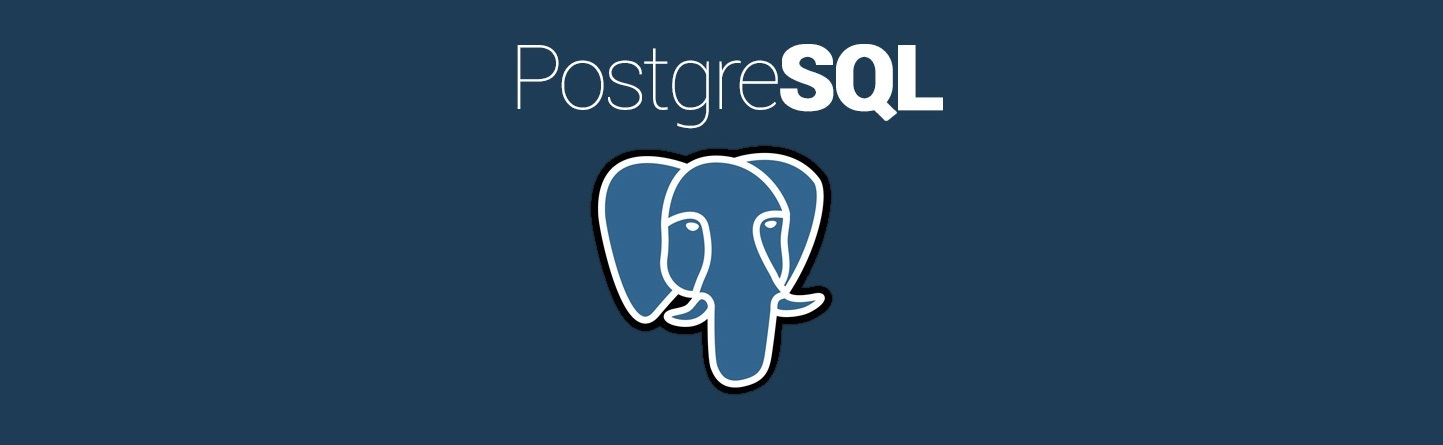

**Содержание** <a class='anchor' id='table_of_contents'></a>

* [Шаг 1. Подключение к базе данных](#step_1)
    * [Описание базы данных](#step_1_1)
* [Шаг 2. Общий анализ таблиц](#step_2)
    * [Таблица `books`](#step_2_1)
    * [Таблица `authors`](#step_2_2)
    * [Таблица `ratings`](#step_2_3)
    * [Таблица `reviews`](#step_2_4)
    * [Таблица `publishers`](#step_2_5)
* [Шаг 3. Решение задач](#step_3)
    * [Описание заданий](#step_3_1)
    * [Задание 1](#step_3_2)
    * [Задание 2](#step_3_3)
    * [Задание 3](#step_3_4)
    * [Задание 4](#step_3_5)
    * [Задание 5](#step_3_6)
* [Вывод](#final)

## Шаг 1. Подключение к базе данных <a class='anchor' id='step_1'></a>

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

In [2]:
def select(sql):
  return pd.read_sql(sql, con=engine)

### Описание базы данных <a class='anchor' id='step_1_1'></a>

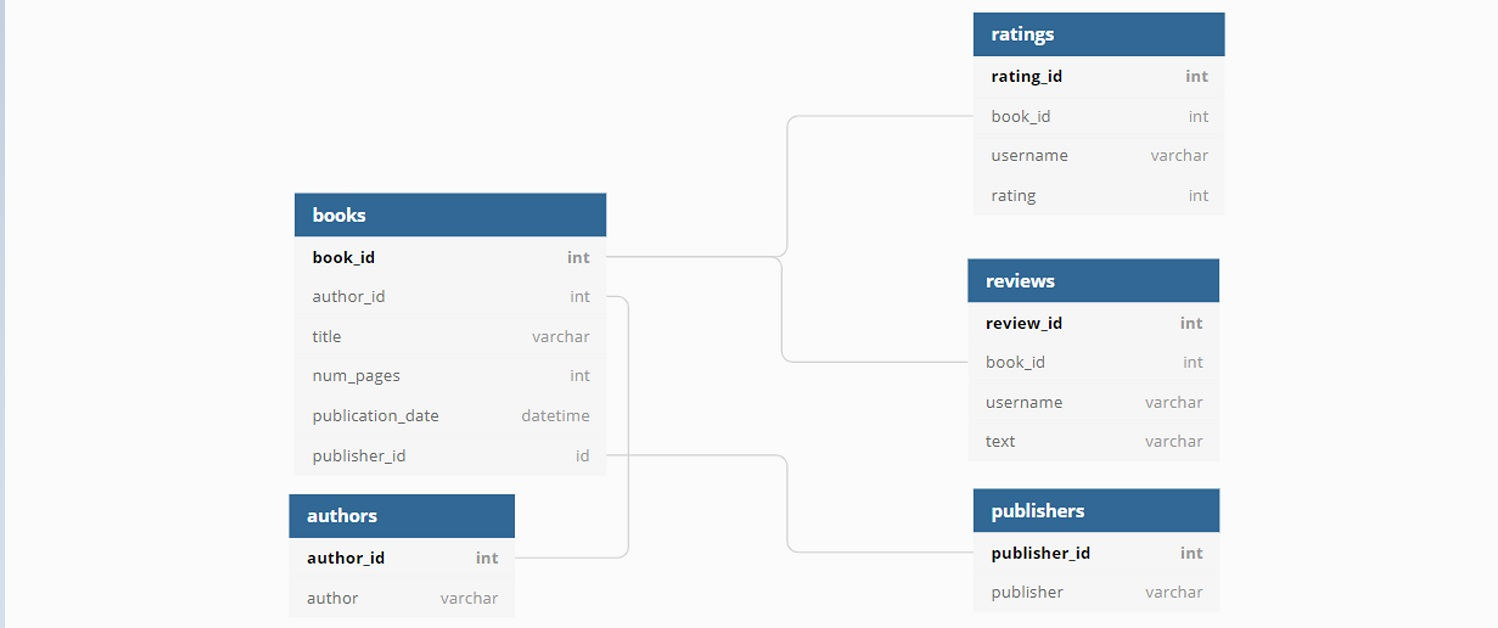

[Назад к содержанию](#table_of_contents)

## Шаг 2. Общий анализ таблиц <a class='anchor' id='step_2'></a>

### Таблица `books` <a class='anchor' id='step_2_1'></a>

In [3]:
sql = '''
SELECT * FROM books
'''
select(sql)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268
...,...,...,...,...,...,...
995,996,571,Wyrd Sisters (Discworld #6; Witches #2),265,2001-02-06,147
996,997,454,Xenocide (Ender's Saga #3),592,1996-07-15,297
997,998,201,Year of Wonders,358,2002-04-30,212
998,999,94,You Suck (A Love Story #2),328,2007-01-16,331


Таблица `books` содержит 1000 строк.  

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

### Таблица `authors` <a class='anchor' id='step_2_2'></a>

In [4]:
sql = '''
SELECT * FROM authors
'''
select(sql)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd
...,...,...
631,632,William Strunk Jr./E.B. White
632,633,Zadie Smith
633,634,Zilpha Keatley Snyder
634,635,Zora Neale Hurston


Таблица `authors` содержит 636 строк. В ней хранятся данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

### Таблица `ratings` <a class='anchor' id='step_2_3'></a>

In [5]:
sql = '''
SELECT * FROM ratings
'''
select(sql)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2
...,...,...,...,...
6451,6452,1000,carolrodriguez,4
6452,6453,1000,wendy18,4
6453,6454,1000,jarvispaul,5
6454,6455,1000,zross,2


Таблица `ratings` содержит 6 456 строк. В ней хранятся данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

### Таблица `reviews` <a class='anchor' id='step_2_4'></a>

In [6]:
sql = '''
SELECT * FROM reviews
'''
select(sql)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...
...,...,...,...,...
2788,2789,999,martinadam,Later hospital turn easy community. Fact same ...
2789,2790,1000,wknight,Change lose answer close pressure. Spend so now.
2790,2791,1000,carolrodriguez,Authority go who television entire hair guy po...
2791,2792,1000,wendy18,Or western offer wonder ask. More hear phone f...


Таблица `reviews` содержит 2 793 строки. В ней хранятся данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

### Таблица `publishers` <a class='anchor' id='step_2_5'></a>

In [12]:
sql = '''
SELECT * FROM publishers
'''
select(sql)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company
...,...,...
335,336,Workman Publishing Company
336,337,Wyatt Book
337,338,Yale University Press
338,339,Yearling


Таблица `publishers` содержит 340 строк. В ней хранятся данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

[Назад к содержанию](#table_of_contents)

## Шаг 3. Решение задач <a class='anchor' id='step_3'></a>

### Описание заданий <a class='anchor' id='step_3_1'></a>

- Посчитайте, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитайте количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

### Задание 1 <a class='anchor' id='step_3_2'></a>

**Посчитайте, сколько книг вышло после 1 января 2000 года.**

Выполним срез книг, которые опубликованы после 1 января 2000 года, и выведем их количество.

In [7]:
sql = '''
SELECT COUNT(*) AS total_books
FROM books t
WHERE t.publication_date > '2000-01-01'
'''
select(sql)

,total_books
0,819


Мы получили 819 книг, которые были выпущены после 1 января 2000 года.

### Задание 2 <a class='anchor' id='step_3_3'></a>

**Для каждой книги посчитайте количество обзоров и среднюю оценку.**

Соединим таблицы `books`, `ratings` и `reviews` по идентификатору книги. Полученную таблицу сгруппируем по книгам и расчитаем количество обзоров и среднюю оценку. Отсортируем по количеству обзоров и средней оценке по убыванию.

In [8]:
sql = '''
SELECT b.book_id,
       b.title,
       count(DISTINCT rev.review_id) AS reviews_cnt,
       round(avg(rat.rating), 2) AS avg_rating
FROM books b
LEFT JOIN ratings rat ON b.book_id = rat.book_id
LEFT JOIN reviews rev ON b.book_id = rev.book_id
GROUP BY b.book_id
ORDER BY 3 DESC, 4 DESC
'''
select(sql)

,book_id,title,reviews_cnt,avg_rating
0,948,Twilight (Twilight #1),7,3.66
1,302,Harry Potter and the Prisoner of Azkaban (Harr...,6,4.41
2,299,Harry Potter and the Chamber of Secrets (Harry...,6,4.29
3,656,The Book Thief,6,4.26
4,734,The Glass Castle,6,4.21
...,...,...,...,...
995,191,Disney's Beauty and the Beast (A Little Golden...,0,4.00
996,387,Leonardo's Notebooks,0,4.00
997,221,Essential Tales and Poems,0,4.00
998,83,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.67


Больше всего обзоров у книги Twilight (Twilight #1)	- 7 обзоров, средняя оценка которых 3.66.

### Задание 3 <a class='anchor' id='step_3_4'></a>

**Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры.**

Создадим временную таблицу `books_by_publisher`, в которой отберем количество книг толще 50 страниц для каждого издательства. В основном запросе с помощью вложенного запроса найдем издательство, выпустившее максимальное количество таких книг.

In [9]:
sql = '''
WITH books_by_publisher AS
    (SELECT p.publisher,
            count(b.book_id) AS total_books
     FROM books b
     LEFT JOIN publishers p ON b.publisher_id = p.publisher_id
     WHERE b.num_pages > 50
     GROUP BY p.publisher)
     
SELECT *
FROM books_by_publisher t
WHERE t.total_books =
        (SELECT max(total_books)
         FROM books_by_publisher)
'''
select(sql)

,publisher,total_books
0,Penguin Books,42


Больше всего книг выпустило издательство Penguin Books - 42 книги.

### Задание 4 <a class='anchor' id='step_3_5'></a>

**Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками.**

Создадим временную таблицу `filtered_books`, в которой отберем только книги с 50 и более оценками. В другой временной таблице `avg_ratings` расчитаем средние оценки для каждого автора, соединив временные таблицы по внутреннему пересечению строк. В основном запросе найдем с помощью вложенного запроса автора с самой высокой средней оценкой.

In [10]:
sql = '''
WITH filtered_books AS
    (SELECT b.book_id
     FROM books b
     LEFT JOIN ratings r ON b.book_id = r.book_id
     GROUP BY b.book_id
     HAVING count(DISTINCT r.rating_id) >= 50),

     avg_ratings AS
    (SELECT a.author,
            round(avg(r.rating), 2) AS avg_rating
     FROM books b
     JOIN filtered_books f ON b.book_id = f.book_id
     LEFT JOIN ratings r ON b.book_id = r.book_id
     LEFT JOIN authors a ON b.author_id = a.author_id
     GROUP BY a.author)
     
SELECT *
FROM avg_ratings a
WHERE a.avg_rating =
        (SELECT max(avg_rating)
         FROM avg_ratings)

'''
select(sql)

,author,avg_rating
0,J.K. Rowling/Mary GrandPré,4.29


 J.K. Rowling/Mary GrandPré являются авторами с самой высокой средней оценкой книг - 4.29.

### Задание 5 <a class='anchor' id='step_3_6'></a>

**Посчитайте среднее количество обзоров от пользователей, которые поставили больше 50 оценок.**

Создадим временную таблицу `selected_users`, в котором отфильтруем пользователей, которые поставили больше 50 оценок.
Также, создадим временную таблицу `total_reviews`, в котором расчитаем количество обзоров каждого пользователя.

В итоговом запросе соединим две временные таблицы, оставив только внутреннее пересечение их строк. Расчитаем среднее число обзоров для отфильтрованных пользователей.

In [11]:
sql = '''
WITH selected_users AS
    (SELECT rev.username,
            COUNT(DISTINCT rat.rating_id) AS total_ratings
     FROM reviews rev
     LEFT JOIN ratings rat ON rev.username = rat.username
     GROUP BY rev.username
     HAVING COUNT(DISTINCT rat.rating_id) > 50),

     total_reviews AS
    (SELECT r.username,
            COUNT(DISTINCT r.review_id) AS total_reviews
     FROM reviews r
     GROUP BY r.username)
     
SELECT round(avg(r.total_reviews), 1) AS avg_reviews_count
FROM selected_users u
JOIN total_reviews r ON u.username = r.username
'''
select(sql)

,avg_reviews_count
0,24.3


Пользователи, которые поставили больше 50 оценок, в среднем написали более 24 обзоров.

[Назад к содержанию](#table_of_contents)

## Вывод <a class='anchor' id='final'></a>

По итогам проведенного анализа были сделаны следующие выводы:
- 819 книг были выпущены после 1 января 2000 года.
- Больше всего обзоров у книги Twilight (Twilight #1) - 7 обзоров, средняя оценка которых 3.66.
- Больше всего книг выпустило издательство Penguin Books - 42 книги.
- J.K. Rowling/Mary GrandPré являются авторами с самой высокой средней оценкой книг - 4.29.
- Пользователи, которые поставили больше 50 оценок, в среднем написали более 24 обзоров.

[Назад к содержанию](#table_of_contents)